## Nicolas Pereyra
# Trabajo Practico Semana 3

### Ejercicios:
1) Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función. Recordar que:  |T(jω)|2=T(jω)⋅T(−jω)=T(s)⋅T(−s)|s=jω
 

2) Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

3) Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.

4) Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

5) Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

#### Bonus:
+10 💎 Proponer un planteo alternativo a 1) usando la ωButter
 (ver Schaumann 6.4)  
+10  ⚽️ Simulación numérica y circuital.  
+10  🍺 Presentación en jupyter noteboo  
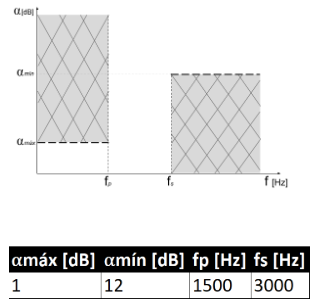

# 1)
### Normalizo:
$\Omega_o = 1500.2.\pi$  
$w_{pn} = 1 = \frac{w_p}{\Omega_o}$  
$w_{sn} = 2 = \frac{w_s}{\Omega_o}$  

### Exprecion del alfa:
$T(jw) = \frac{1}{\alpha(jw)}$
$\alpha(jw) = 10 log(1+\epsilon².w^{2*n})$  

### Obtengo $\epsilon$:
$w = w_p  \Rightarrow \alpha(jw_p) = 1 db$  
$1 db = 10 log(1+\epsilon².1^{2*n})$  
$\epsilon² = 10^{\frac{\alpha_{max}}{10}}-1$
$\epsilon² = 0.2589 \Rightarrow	 \epsilon = 0.5088$  

### Obtengo $n$:
$w = w_s  \Rightarrow \alpha(jw_s) = 12 db$  
$12 db = 10 log(1+0.2589.2^{2*n})$  
$n = \frac{1}{2}.log_2(\frac{10^{1.2}-1}{0.5088}) = 2.433$

$n = 3 \Rightarrow alfa(jw_s) = 12.4476 dB$

### Obtengo la trasferencia:

$|T(jw)|² = \frac{1}{\alpha(s)}= \frac{1}{1+\epsilon².w^{2n}}$  
$w_n = \frac{w}{w_b}  \Rightarrow w_b = \Omega_o.\epsilon^{-1/n}$

#### Paso de Fourier a Laplace

$w_n = \frac{s_n}{j}$

$|T(s)|² = \frac{1}{\alpha(s)}= \frac{1}{1+\frac{s_n^{2.n}}{j^{2.n}}}$  
$|T(s)|² = \frac{1}{1+(-1)^{n}.s_n^{2.n}}$  
$|T(s)|² = \frac{1}{1-s_n^{6}}$  

#### Busco los polos: 
$e^{j(0+2.\pi.k)} = s⁶ \Rightarrow s = e^{\frac{j.\pi.k}{3}}$  
$\Psi_1 = 0° ; \Psi_2 = 60° ; \Psi_3 = 120° ; \Psi_4 = 180° ; \Psi_5 = 240° ; \Psi_6 = 300$  

Debido a que quiero que los polos se encuentren en el segundo y tercer cuadrante voy a decir que a $T(s)$ le pertenecen $\Psi_3,\Psi_4 y \Psi_5$

$T(s_n) = \frac{1}{s_n+e^{j\Psi_3}}\frac{1}{s_n+e^{j\Psi_4}}\frac{1}{s_n+e^{j\Psi_5}}$

$T(s_n) = \frac{1}{s-1}\frac{1}{s^2+s.2.cos(\Psi_3-180°)+1}$  

$T(s_n) = \frac{1}{s_n³+s_n².2+s_n.2+1}$  

#### Desnormalizamos la trasferencia:
$T(s) = \frac{w_b³}{s³+s².2.w_b+s.2.w_b²+w_b³}$  
$T(s) = \frac{\Omega_o³.\epsilon^{-1}}{s³+s².2.\Omega_o.\epsilon^{-1/3}+s.2.\Omega_o².\epsilon^{-2/3}+\Omega_o³.\epsilon^{-1}}$

# 2)
### Diagrama de polos y ceros:
En el diagrama se pueden observar 6 polos en total esto se debe a que se quizo representar graficamente como afecta el ripple al diagrama de polos y ceros, haciendo circunferencias mas grandes para $\epsilon$ menores a 1 y circunferencias mas chicas para $\epsilon$ mayores a 1.  
(Simulaciones hechas en matlab)  


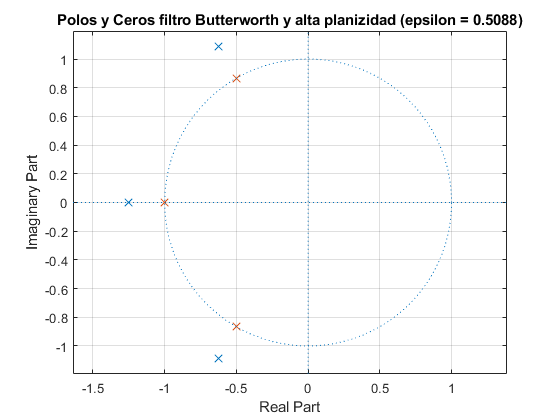

### Bode Normalizado:
(Simulaciones hechas en matlab)
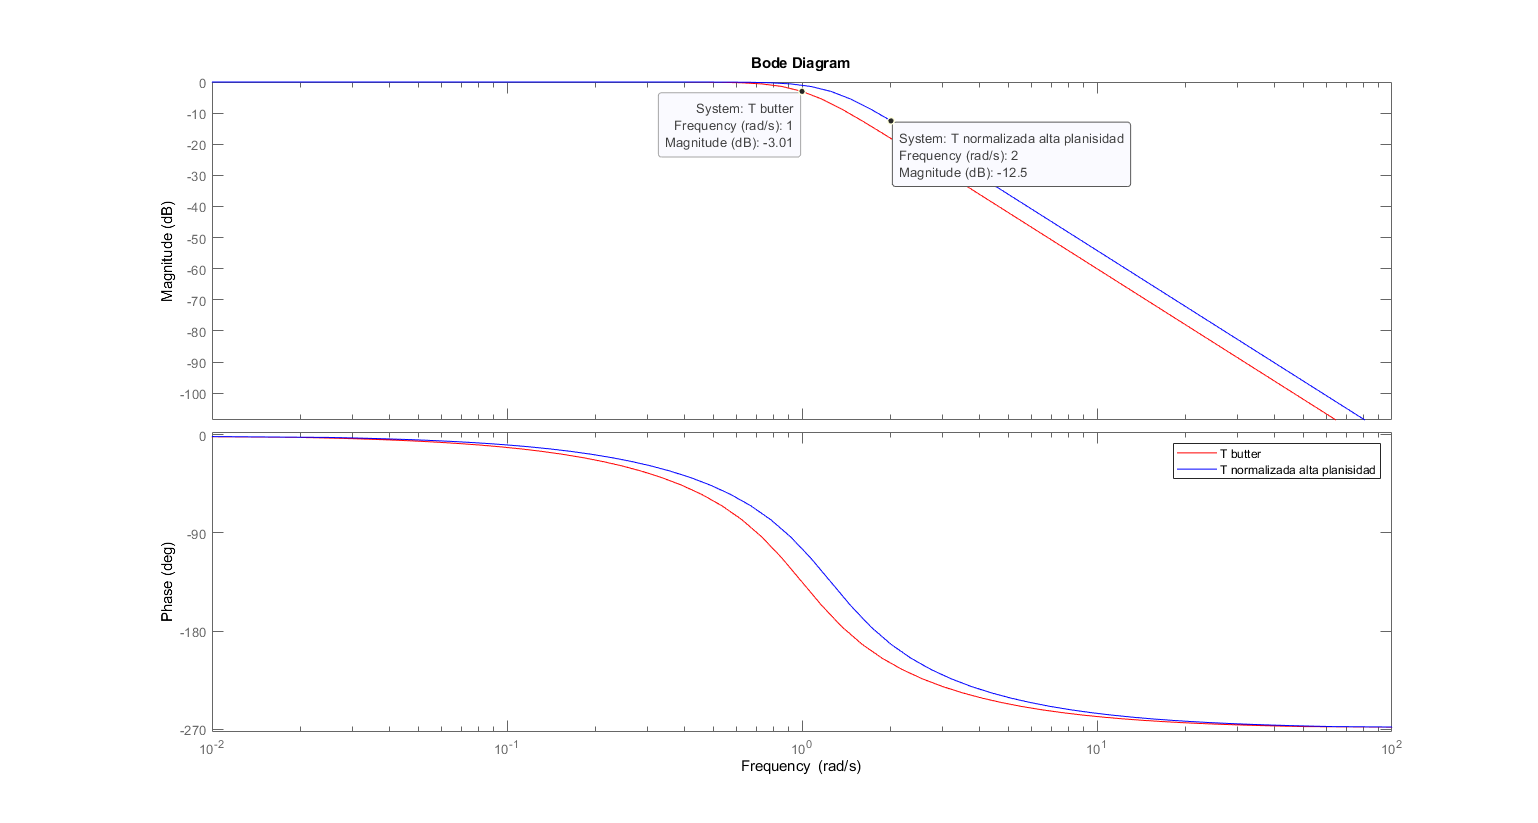

### Bode desnormalizado:
(Simulaciones hechas en matlab)
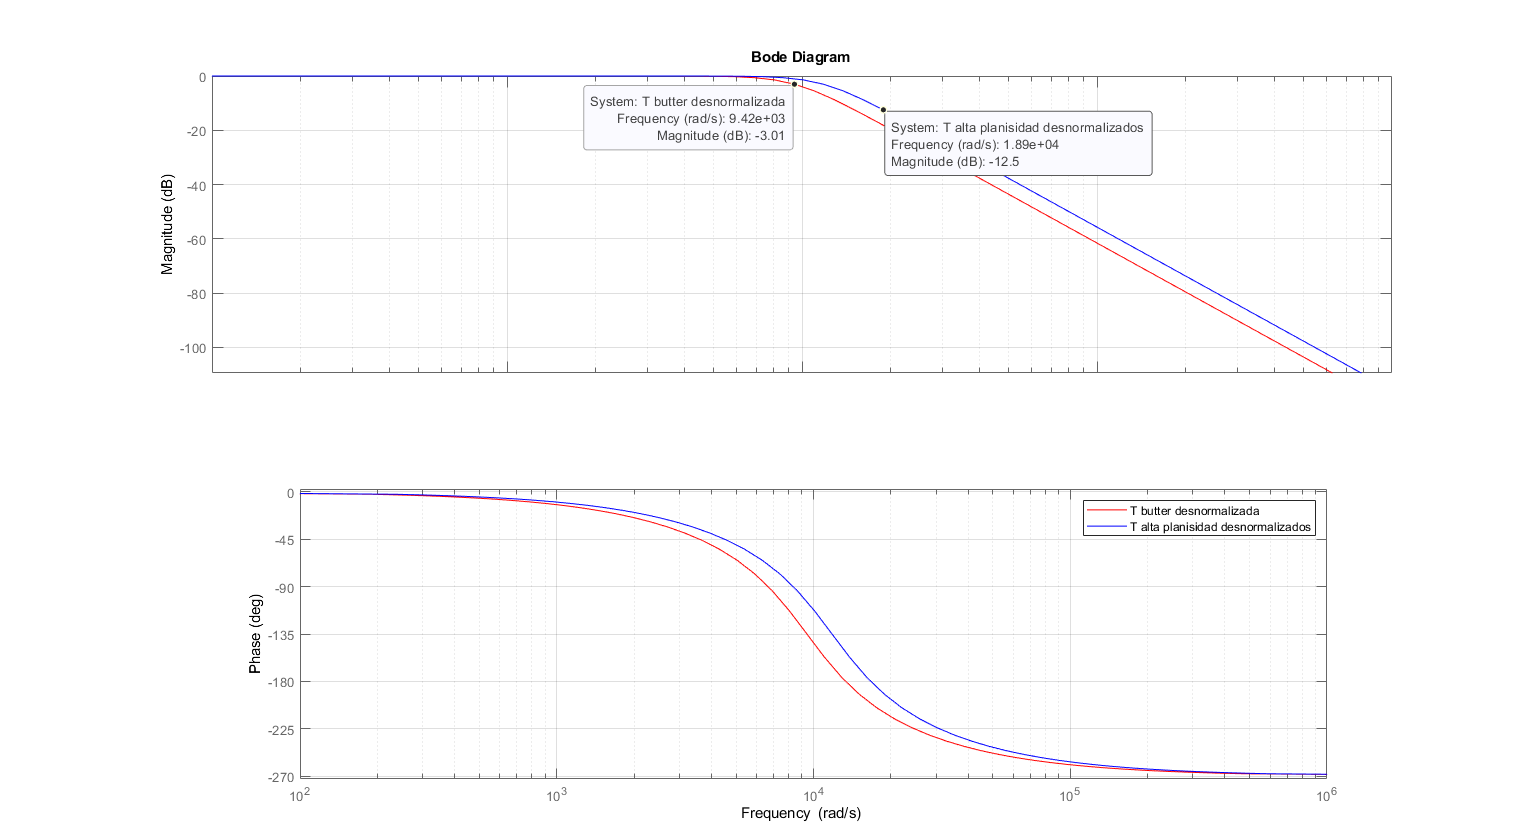

# 3)
Para lograr esto coloque un filtro pasa bajos de orden 2 pasivo con impedancias $L , C_1 y R_1$ con la salida conectada a la entrada $V+$ del buffer no inversor con una ganancia de $g$. La salida del buffer esta conectada a un filtro pasa bajos de primer orden.  
### Transferencia de pasa bajos de Segundo orden:  
$T_{intermedia1}(s) =\frac{V_{\alpha}}{V_i} = \frac{\frac{1}{C_1.L}}{s²+s.\frac{R_1}{L}+\frac{1}{C_1.L}} \Rightarrow V_{\alpha}= V_{\beta}$  
### Trasnferencia de primer orden:
$T_{intermedia2}(s) =\frac{V_o}{V_{\beta}} = \frac{\frac{1}{C_2.R_2}}{s+\frac{1}{C_2.R_2}}$

## Trasferencia del circuito:
$T_{intermedia1}.T_{intermedia2} = \frac{V_{\alpha}}{V_i}.\frac{V_o}{V_{\beta}} = \frac{V_o}{V_i}.\frac{V_{\alpha}}{V_{\beta}} = T(s) \Rightarrow T(s) = T_{intermedia1}.T_{intermedia2}$

 
$T(s)= \frac{\frac{1}{C_1.C_2.R_2.L}}{s³+s².(\frac{R_1}{L}+\frac{1}{C_2.R_2})+s.(\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2})+\frac{1}{C_1.C_2.R_2.L}}$  

## Eleccion de componentes ($\epsilon = 1$) :
Para que el circuito tenga el mismo comportamiento que el obtuvido por analiticamente por maxima planicidad se tiene que cumplir lo siguiente.

$T(s)= \frac{\frac{1}{C_1.C_2.R_2.L}}{s³+s².(\frac{R_1}{L}+\frac{1}{C_2.R_2})+s.(\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2})+\frac{1}{C_1.C_2.R_2.L}} = \frac{1}{s³+s².2+s.2+1}$  

Osea:  
a) $C_1.C_2.R_2.L = 1$  
b) $\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2} = 2$  
c) $\frac{R_1}{L}+\frac{1}{C_2.R_2} = 2$  

De c) sacamos que  
$\frac{C_2.R_2}{L.C_1.C_2.R_2}+\frac{R_1.C_1}{L.C_1.C_2.R_2} = 2 \Rightarrow L.C_1.C_2.R_2 = 1$  
  
b´)$C_2.R_2 + R_1.C_1 = 2$ 
  
   
De c) sacamos:  
$\frac{R_1.C_1.C_2.R_2}{L.C_1.C_2.R_2}+\frac{L.C_1}{L.C_1.C_2.R_2} = 2$  
  
c´) $R_1.C_1.C_2.R_2 + L.C_1 = 2$  

### Ejemplo:
Para facilitar los numeros y la logica vamos a decir que $C_1.R_1 = R_2.C_2 = 1 = C.R \Rightarrow C = 1; R = 1$  

Devido a la restriccion que pusimos arriba y a d´) $L = 1$  


### Circuito:
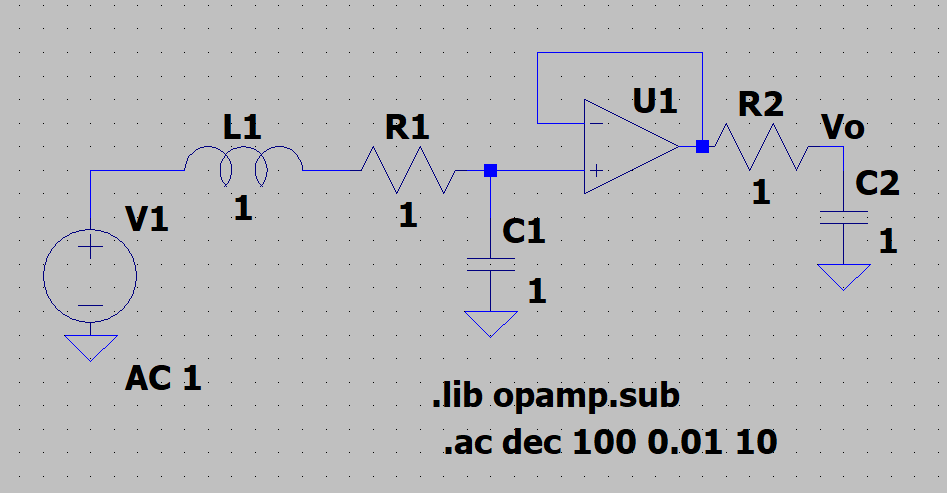


### Bode:
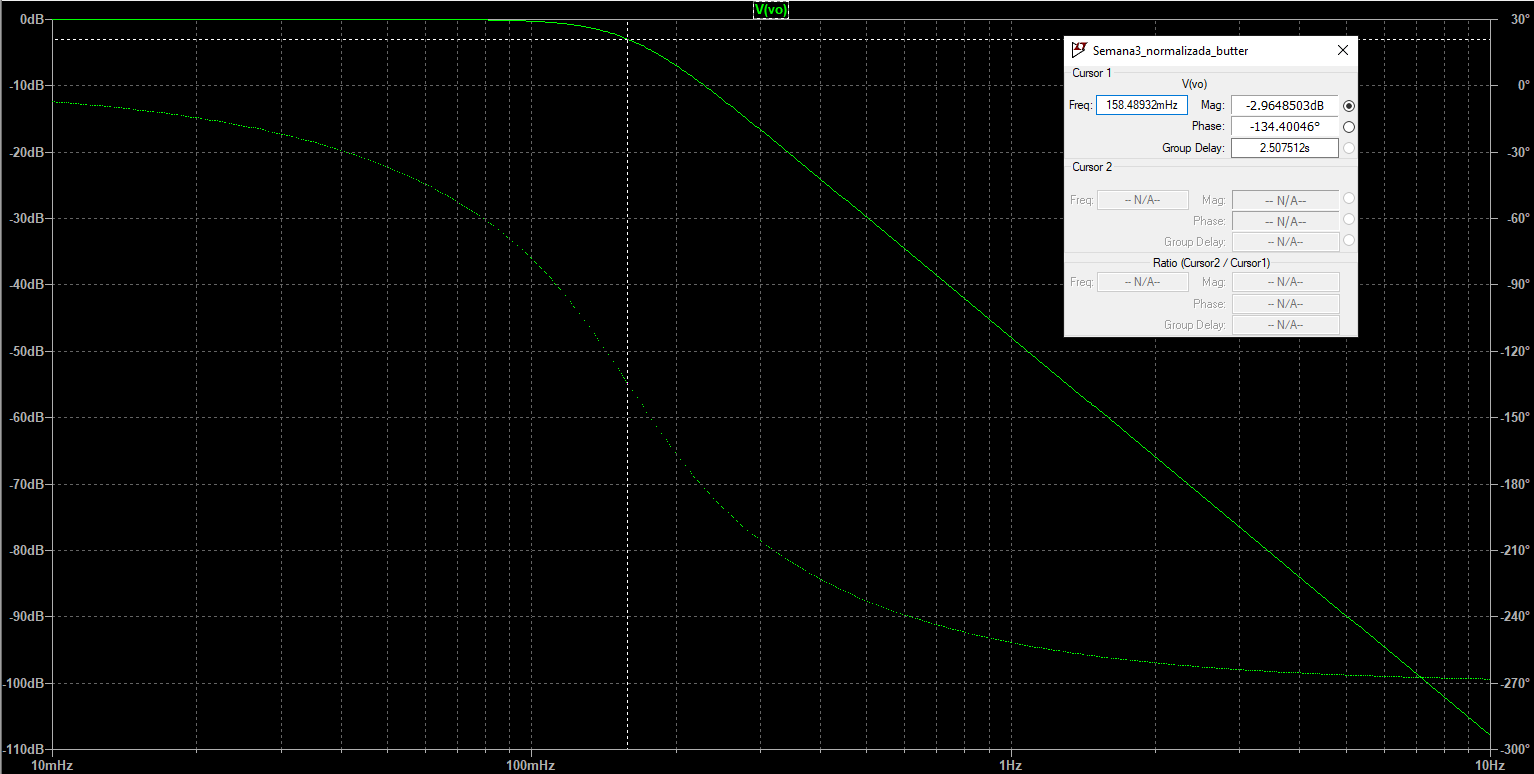

Se puede observar que el circuito se comporta de igual manera que el bode hecho en matlab.  

## Eleccion de componentes ($\epsilon = 0.508$) :
$T(s) = \frac{\epsilon^{-1}}{s³+s².2.\epsilon^{-1/3}+s.2.\epsilon^{-2/3}+\epsilon^{-1}} = \frac{1.965}{s³+s².2.505+s.3.138+1.965}$  
  
$T(s)= \frac{\frac{1}{C_1.C_2.R_2.L}}{s³+s².(\frac{R_1}{L}+\frac{1}{C_2.R_2})+s.(\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2})+\frac{1}{C_1.C_2.R_2.L}} =  \frac{1.965}{s³+s².2.505+s.3.138+1.965}$  
  
Osea:  
a) $C_1.C_2.R_2.L = \frac{1}{1.965}$  
b) $\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2} = 3.138$  
c) $\frac{R_1}{L}+\frac{1}{C_2.R_2} = 2.505$ 
  
Propongo que $C_1 = C_2 = C ; R_1 = R_2 = R$:  
a) $\Rightarrow L = \frac{0.5}{C².R}$  
b) $\Rightarrow L.C = 0.637$  
Rescribo a):  
a) $\Rightarrow C = \frac{0.785}{R}$  
  
Ejemplo:  
$R = 1 ; C = 0.785 ; L = 0.811$

### Circuito:
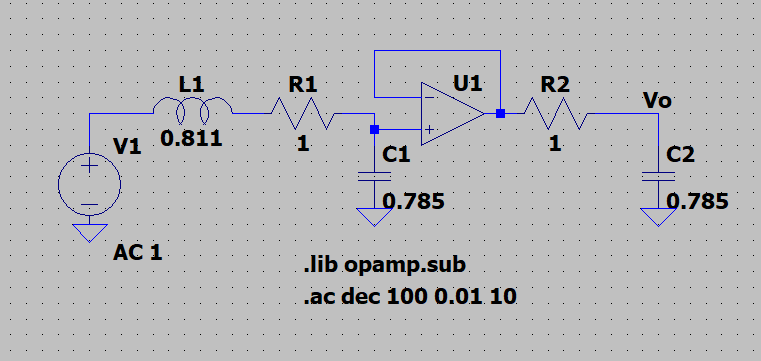

### Bode:
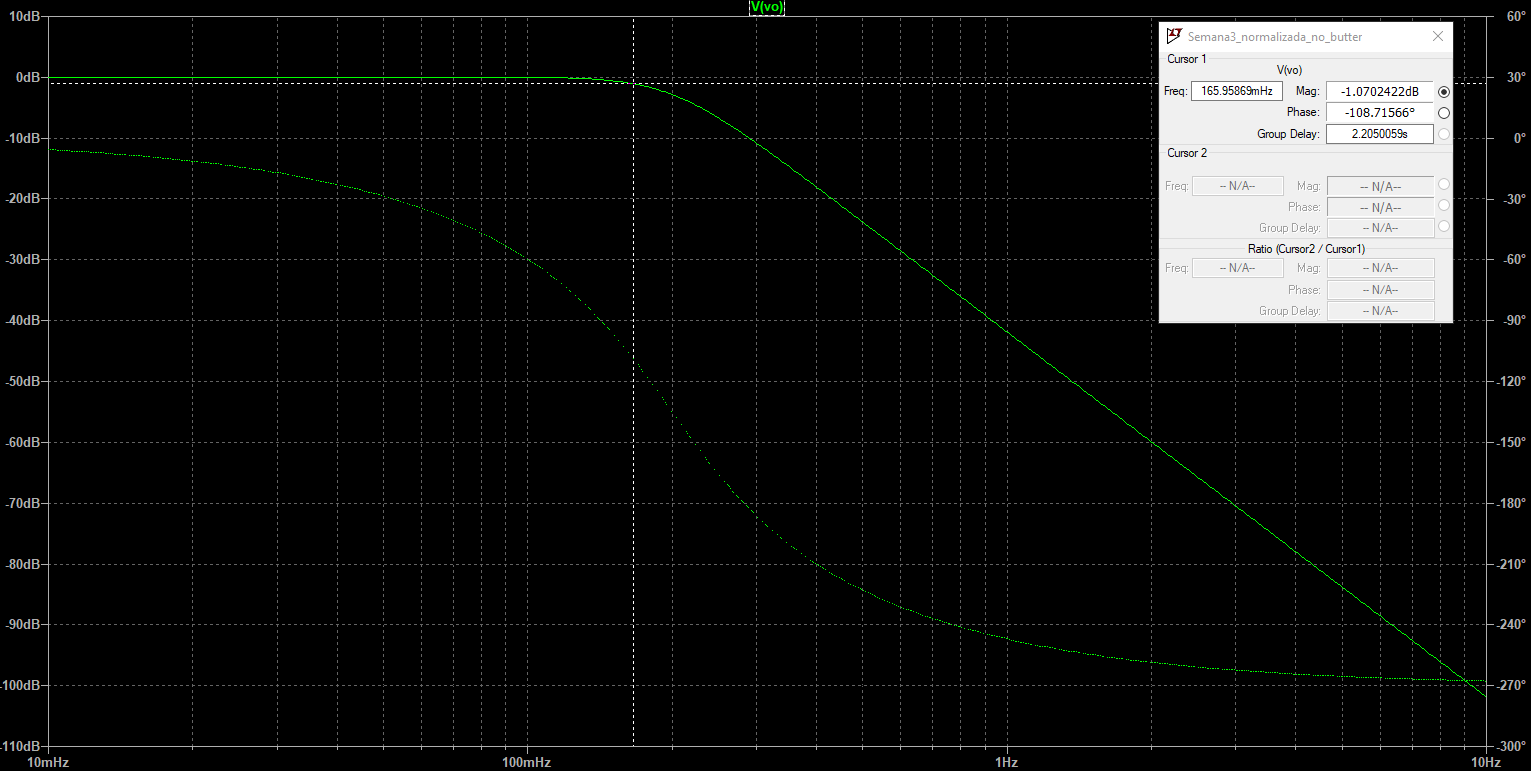

# 4)
## Butterworth ($\epsilon = 1$):
$R_n = \frac{R}{R_o} ; L_n = L \frac{\Omega_o}{R_o}; C_n = C.\Omega_o.R_o = 1 \Rightarrow \Omega_o = 1500.2.\pi = 9.42ks^{-1}$  
  
$C_{real} = 100nF \Rightarrow 1 = \Omega_o.R_o.C_{real} \Rightarrow R_o = 1061.57\Omega$  
  
$R_1 = R_2 = R \Rightarrow R_{real} = R_o = 1061.57\Omega$  
  
$L_n = L.\frac{\Omega_o}{R_o} \Rightarrow L = \frac{R_o}{\Omega_o} = 112.69mHenry$  
  
En conclucion los valores de los componentes quedan de la siguiente manera:  
$L = 112.69.mHenry$  
$R_1 = R_2 = 1061.57\Omega$  
$C_1 = C_2 = 100nF$  


### Circuito:
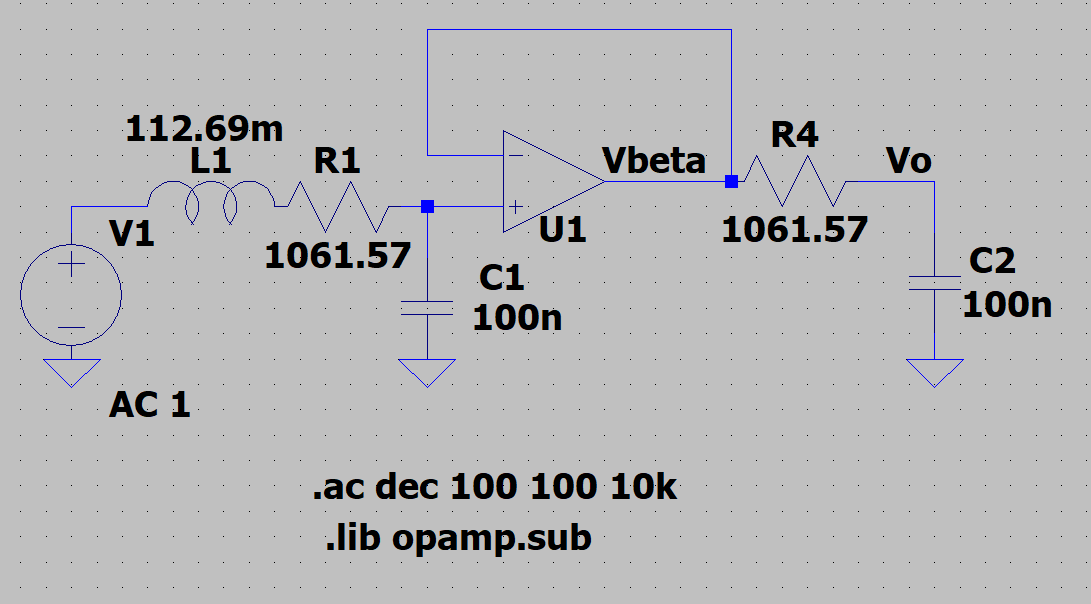


### Bode:
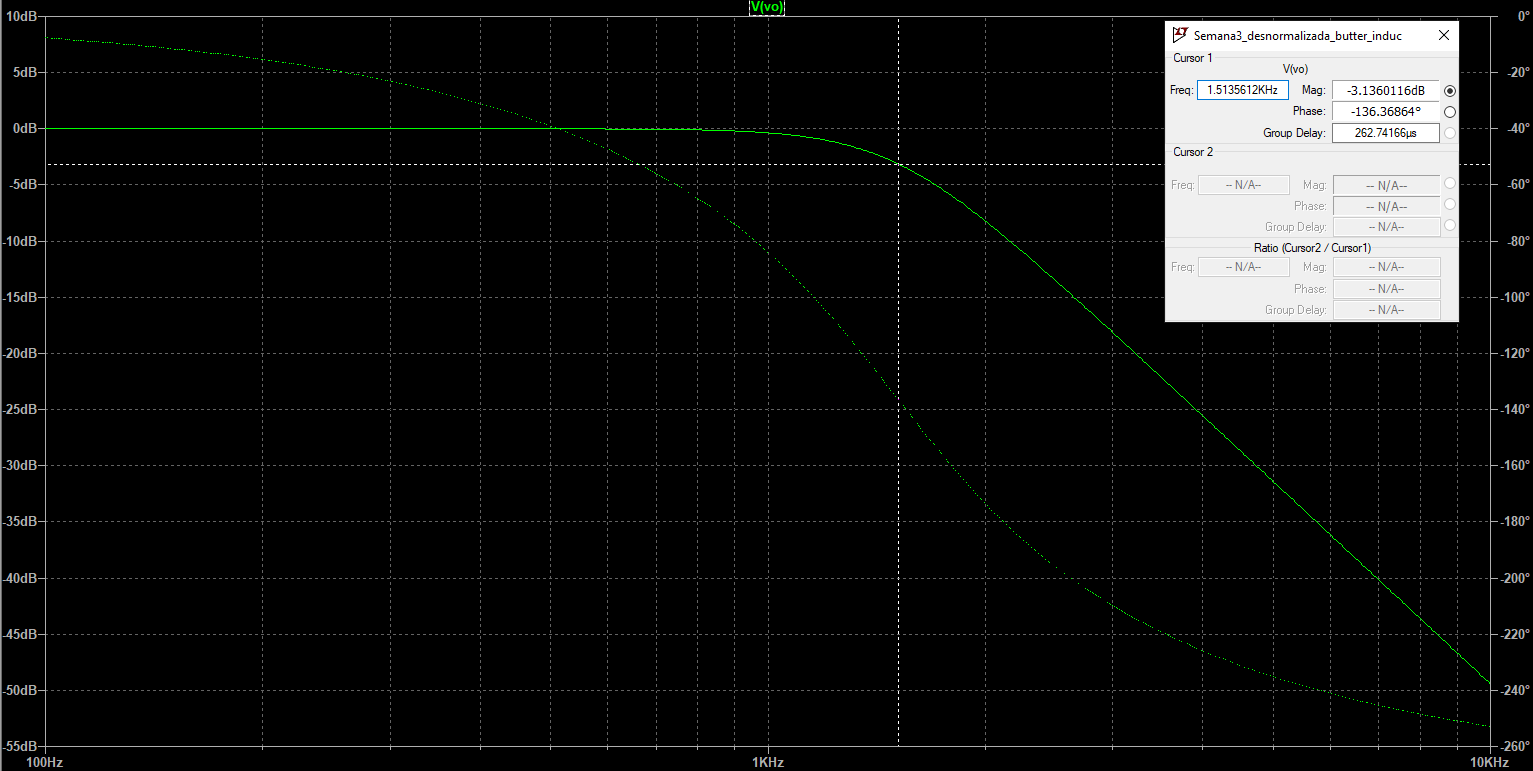

## Filtro de alta planisidad ($\epsilon = 0.508$):
$R_n = \frac{R}{R_o} ; L_n = L \frac{\Omega_o}{R_o}; C_n = C.\Omega_o.R_o = 1 \Rightarrow \Omega_o = 1500.2.\pi = 9.42ks^{-1}$  
  
$C_{real} = 100nF \Rightarrow 0.785 = \Omega_o.R_o.C_{real} \Rightarrow R_o = 833.33\Omega$  
  
$R_1 = R_2 = R \Rightarrow R_{real} = R_o = 833.33\Omega$  
  
$L_n = L.\frac{\Omega_o}{R_o} \Rightarrow L = Ln.\frac{R_o}{\Omega_o} = 71.74mHenry$  
  
En conclucion los valores de los componentes quedan de la siguiente manera:  
$L = 71.74.mHenry$  
$R_1 = R_2 = 833.33\Omega$  
$C_1 = C_2 = 100nF$  

### Circuito:
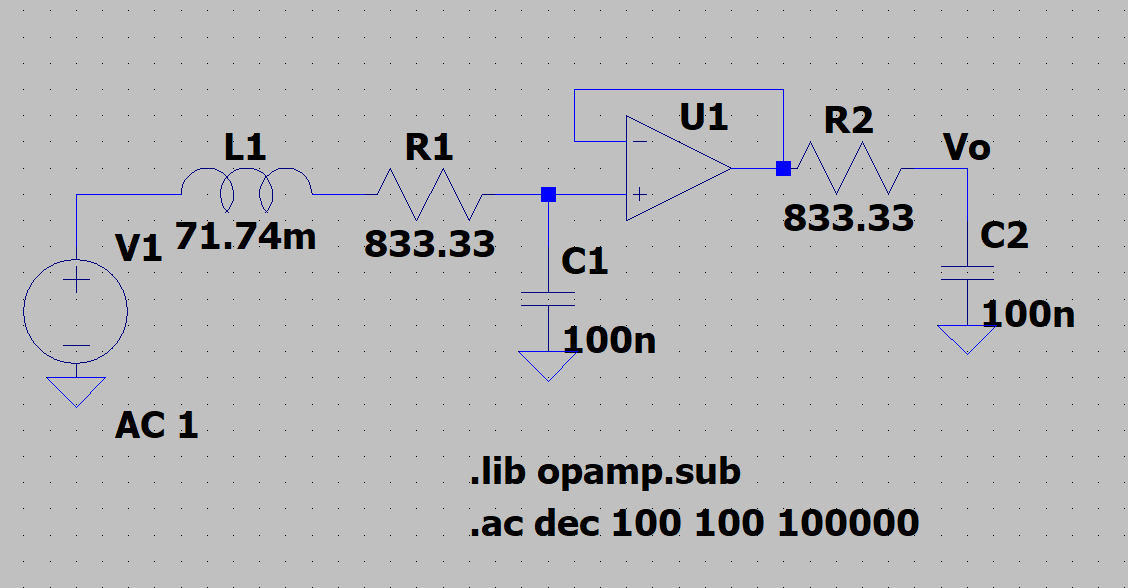

### Bode:
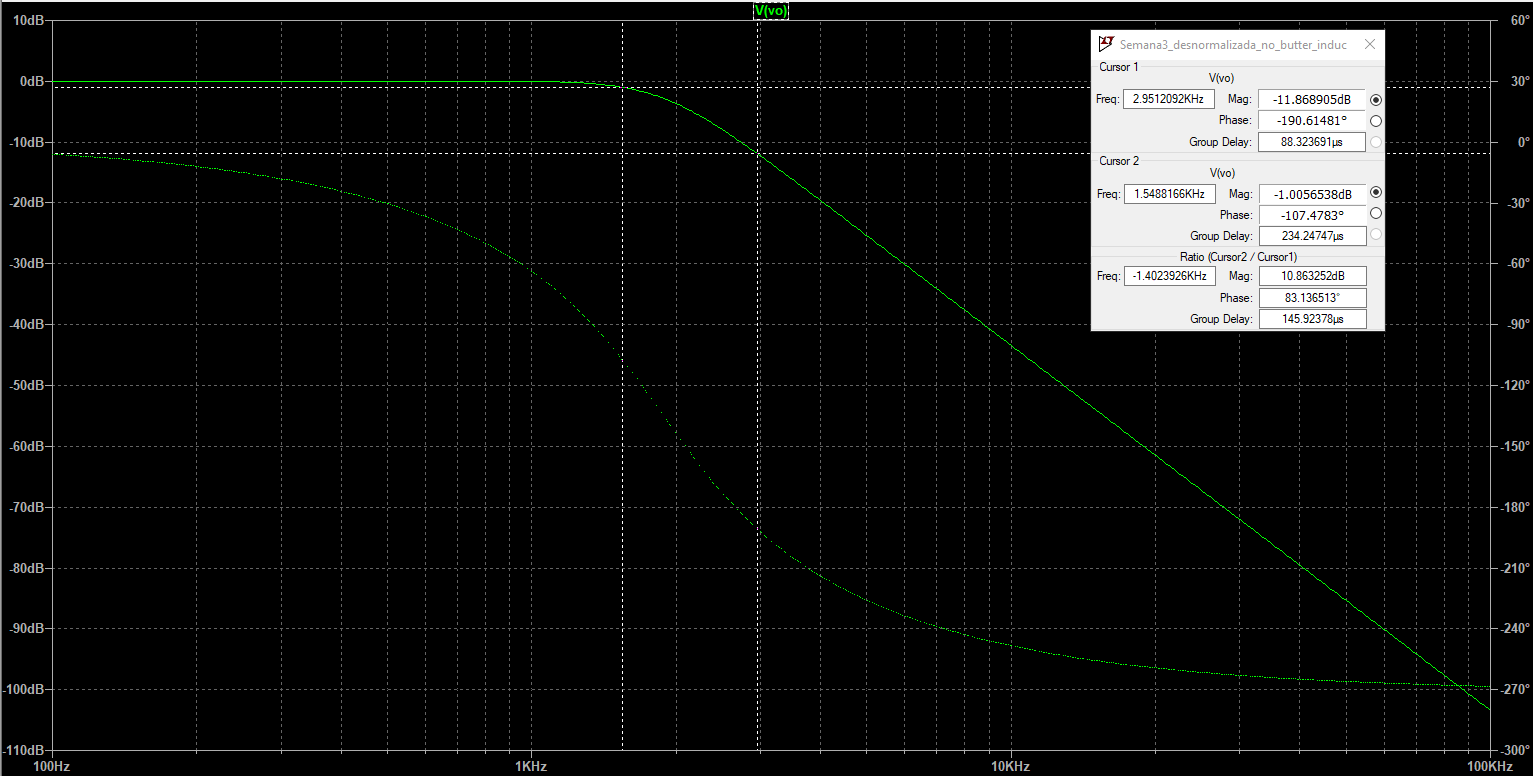

# 5)
## Butterworth:
### Componentes originales:
$L = 112.69.mHenry$  
$R_1 = R_2 = 1061.57\Omega$  
$C_1 = C_2 = 100nF$  
  
### Desarrollo:
Para poder consguir un circuito equivalente sin la utilizacion de inductores tome las impedancias de la primera etapa (estapa de orden dos entre $V_i$ y el buffer) y dividi a cada una por $\frac{1}{s.C}$. Pasando a tener las sicuientes impedancias:  
$Z_R = \frac{L}{C} = R'$  
$Z_c = \frac{R}{s.C} = \frac{1}{s.C'}$  
$Z_{fdnr} = \frac{k}{s².C²}$  
  
Dado a las limitaciones con los valores de capacitores solo se podran usar capacitores de $100nF$. Por lo tanto devemos adaptar el valor de los componentes para mantener la trasferencia. Paro poder lograr esto $C$ de la ecuacion $Z_c$ sabiendo que $C' = 100nF$. Dandiones finalmente:  
$C = 100n . 1061.57 = 106.157\mu F$   
  
Conociendo C podemos conseguir el resto de los componetes:  
$R' = \frac{L}{C}=\frac{112.69.m}{106.157\mu} = 1061.54$  
  
Finalmente para la impedancia $Z_{fdnr}$ tenemos que $Z_{fdnr} = \frac{1}{s².C.C'}=\frac{k}{s².C²}$, siendo $k =\frac{R_1}{R_2.R_4}$, por lo tanto devemos obtener un $k = \frac{C}{C'} = 942 \mu \Omega$. Considerando a $R_1 = R_2 = R_4 = R_g$ obtenemos que $R_g = 1061.57 \Omega$.  
  
### Valores finales:
Finalmente obtenemos los siguientes valores para los componentes:  
$R' = 1061.54 \Omega \thickapprox 1k \Omega$  
$R_g = 1061.57 \Omega \thickapprox 1k \Omega$  
$C = 100nF$  
### Circuito:
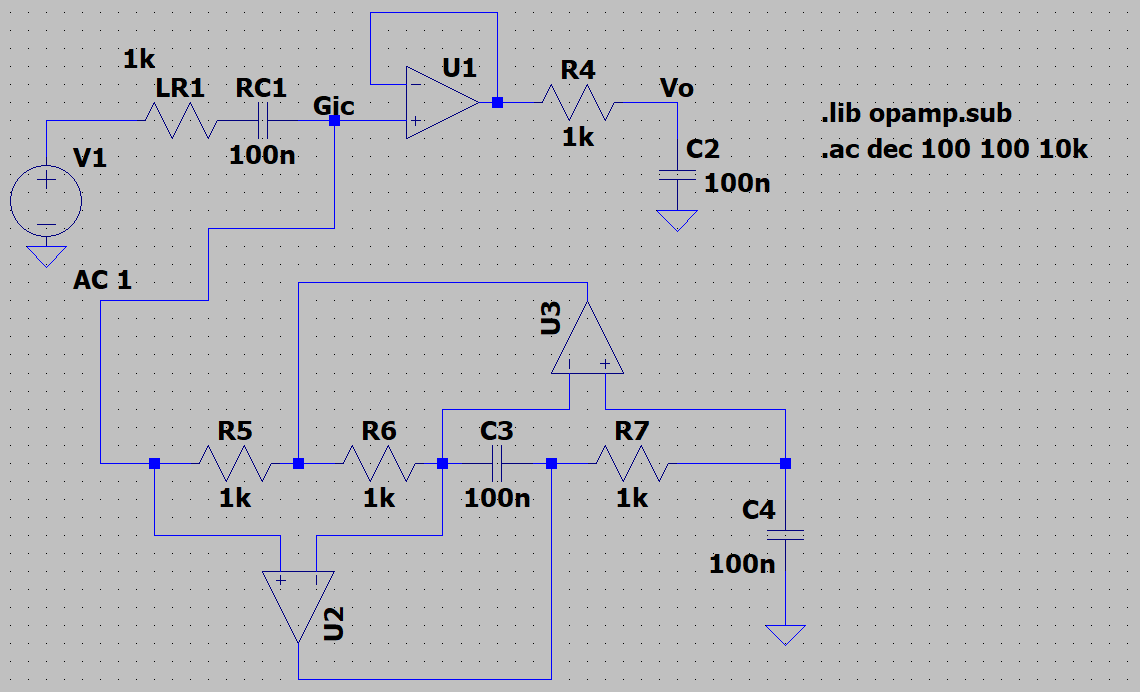

### Bode:
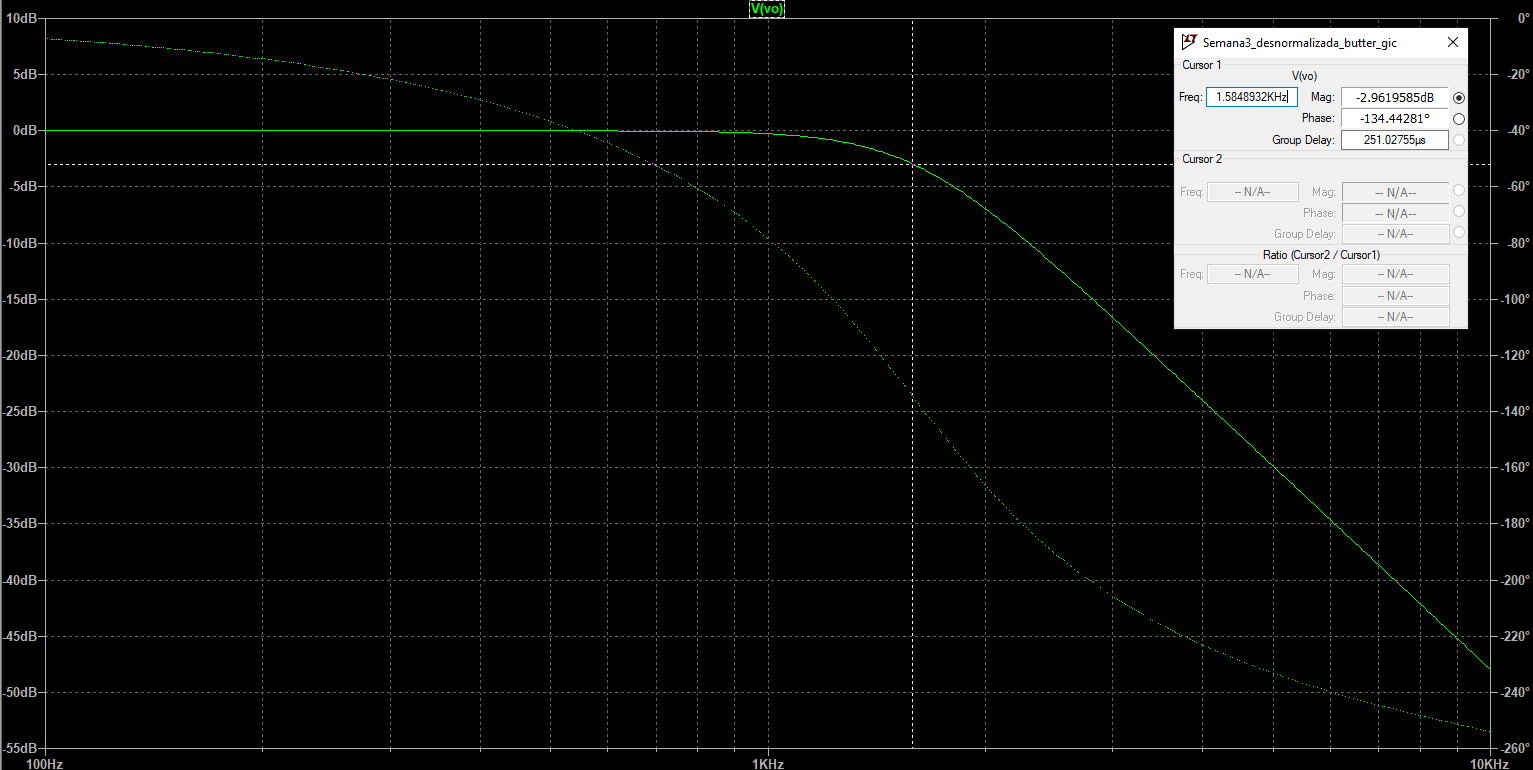

## Alta planisidad ($\epsilon = 0.508$):
### Componentes originales:
$L = 71.74.mHenry$  
$R_1 = R_2 = 833.33\Omega$  
$C_1 = C_2 = 100nF$  
  
### Desarrollo:
Para poder consguir un circuito equivalente sin la utilizacion de inductores tome las impedancias de la primera etapa (estapa de orden dos entre $V_i$ y el buffer) y dividi a cada una por $\frac{1}{s.C}$. Pasando a tener las sicuientes impedancias:  
$Z_R = \frac{L}{C} = R'$  
$Z_c = \frac{R}{s.C} = \frac{1}{s.C'}$  
$Z_{fdnr} = \frac{k}{s².C²}$  
  
Dado a las limitaciones con los valores de capacitores solo se podran usar capacitores de $100nF$. Por lo tanto devemos adaptar el valor de los componentes para mantener la trasferencia. Paro poder lograr esto $C$ de la ecuacion $Z_c$ sabiendo que $C' = 100nF$. Dandiones finalmente:  
$C = 100n . 833.33 = 83.333\mu F$   
  
Conociendo C podemos conseguir el resto de los componetes:  
$R' = \frac{L}{C}=\frac{71.74.m}{83.333\mu} = 860.88$  
  
Finalmente para la impedancia $Z_{fdnr}$ tenemos que $Z_{fdnr} = \frac{1}{s².C.C'}=\frac{k}{s².C²}$, siendo $k =\frac{R_1}{R_2.R_4}$, por lo tanto devemos obtener un $k = \frac{C}{C'} = 1200 \mu \Omega$. Considerando a $R_1 = R_2 = R_4 = R_g$ obtenemos que $R_g = 833.33 \Omega$.  
  
### Valores finales:
Finalmente obtenemos los siguientes valores para los componentes:  
$R' = 860.88 \Omega \thickapprox 820 \Omega$  
$R_g = 833.33 \Omega \thickapprox 820 \Omega$  
$C = 100nF$  
### Circuito:
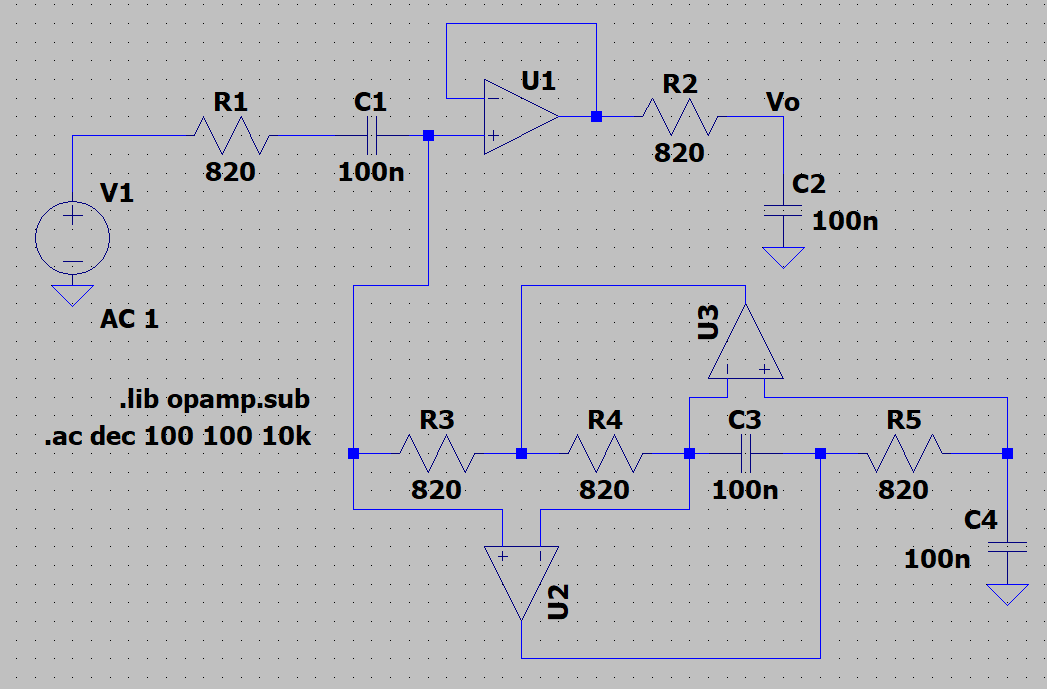

### Bode:
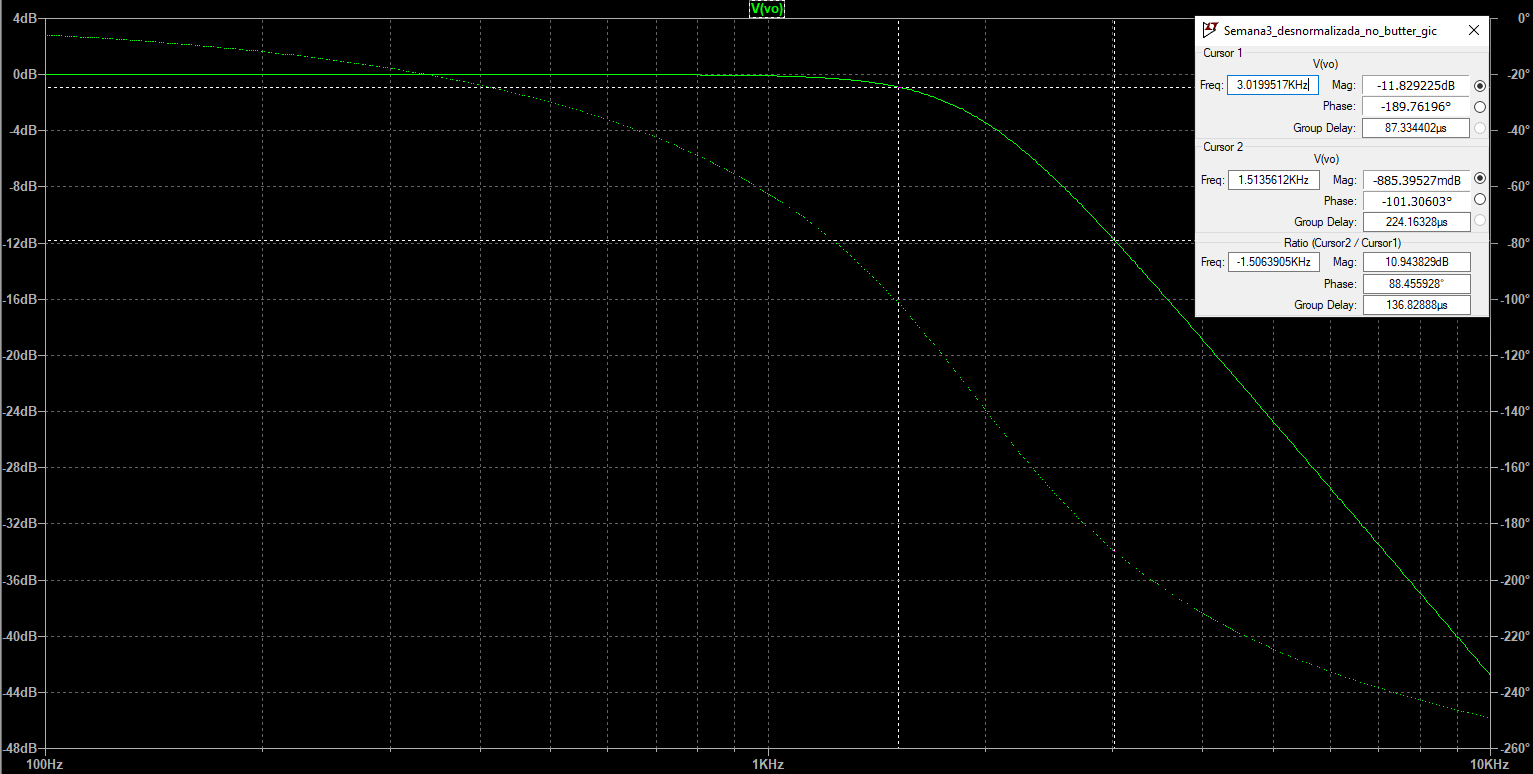